<a href="https://colab.research.google.com/github/GilbertoRocha/Estudos/blob/master/FormacaoCientistaDadosPythoneR/Python/Regressao_linear_simples_base_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exemplo de regressao linear simples, do curso "Formação Cientista de Dados com Python e R

Regressão lienar simples deve ser usado quando existe apenas uma variável explanatoria para prever uma variáel dependente


Quando usar:

a correlação for considerada moderada ou forte entre as duas variaveis, digamos acima de 0.75 ou menor -0.75 (correlação negativa)

Coeficiente de determinação (R²)

*   maior que 0.7 é otimo
*   entre 0.7 e 0.3, tem que ser avaliado
*   menor que 0.3 é ruim

Residuais padronizados proximos a distribuição normal






In [0]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
from yellowbrick.regressor import ResidualsPlot

In [0]:
# Carrega a base, neste caso como nao vou importar o arquivo CSV, vou montar manualmente
dados_speed = [4, 4, 7, 7, 8, 9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20, 20, 22, 23, 24, 24, 24, 24, 25]
dados_dist = [2, 10, 4, 22, 16, 10, 18, 26, 34, 17, 28, 14, 20, 24, 28, 26, 34, 34, 46, 26, 36, 60, 80, 20, 26, 54, 32, 40, 32, 40, 50, 42, 56, 76, 84, 36, 46, 68, 32, 48, 52, 56, 64, 66, 54, 70, 92, 93, 120, 85]
colunas = ['speed', 'dist']
base = pd.DataFrame(data=list(zip(dados_speed, dados_dist)), columns=colunas)

In [3]:
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [0]:

# Define o X e Y
X = base.iloc[:, 1].values
y = base.iloc[:, 0].values

In [12]:
# verifica a correlacao entre a distancia e velocidade
correlacao = np.corrcoef(X, y)
print(correlacao)

[[1.        0.8068949]
 [0.8068949 1.       ]]


In [13]:
# Como a correlacao é forte, então é possivel fazer o modelo de regressão

# muda o formato para matriz, por conta do modelo de regressao linear
X = X.reshape(-1,1)


# cria o modelo
modelo = LinearRegression()
# treina ele
modelo.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#visualizar a interceptacao
print(modelo.intercept_)

8.283905641787172


In [15]:
# visualiza a inclinação
print(modelo.coef_)

[0.16556757]


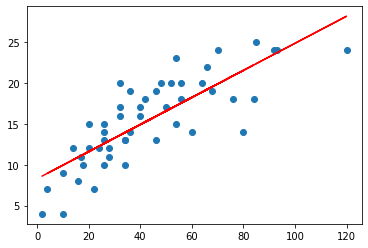

In [19]:
# Visualizando em graficos de dispersao
plt.scatter(X,y)
# adiciona a linha de regressão
plt.plot(X, modelo.predict(X), color='r')
plt.show()

In [21]:
# prevendo a distancia de 22, manualmente
print(modelo.intercept_ + modelo.coef_ * 22)

[11.92639228]


In [25]:
# prevendo a distancia de 22, atraves do metodo predict
print(modelo.predict([[22]]))

[11.92639228]


In [28]:
# exibe os residuais (distancia dos pontos usados para calcular a linha de regresssão, com a propria linha)
print(modelo._residues)

478.02124836119646


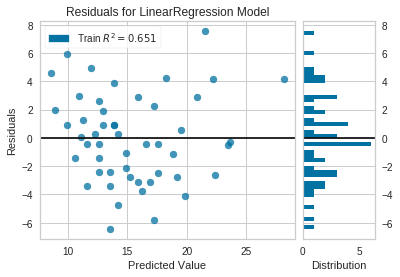

In [31]:
# Como o sklearn nao tem a opção atualmente para ver cada residual, mostrando apenas o total, é usado a biblioteca YellowBrick
# para visualizar o modelo
visualizador = ResidualsPlot(modelo)

# "treina" o visualizador
visualizador.fit(X,y)
visualizador.poof()

# ele vai exibir os residuais em duas parte
# a primeira é passado uma linha representando o zero, ou seja, quanto mais proximo
# mais preciso vai ser, e mais "em cima" da linha de regressao será

# a outra parte é feito um grafico de distribuição, para ver aonde se concentra a maior
# quantidade de valores